In [95]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

In [96]:
movies = pd.read_csv('./ml-latest-small/movies.csv', index_col=None, na_values=['NA'])

In [97]:
movies.shape

(9742, 3)

In [98]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [99]:
ratings = pd.read_csv('./ml-latest-small/ratings.csv', index_col=None, na_values=['NA'])
ratings.shape

(100836, 4)

In [100]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [101]:
mvrt = pd.merge(ratings, movies, on='movieId')

In [102]:
mvrt.shape

(100836, 6)

In [103]:
mvrt.sample(20)

,userId,movieId,rating,timestamp,title,genres
97477,610,77798,2.0,1493848368,"Nightmare on Elm Street, A (2010)",Fantasy|Horror|Thriller
16981,140,48516,3.0,1172255954,"Departed, The (2006)",Crime|Drama|Thriller
31306,288,355,3.0,978470481,"Flintstones, The (1994)",Children|Comedy|Fantasy
79458,448,3614,4.0,1019128089,Honeymoon in Vegas (1992),Comedy|Romance
65578,232,4718,3.5,1218166652,American Pie 2 (2001),Comedy
88148,520,8796,2.5,1326608866,"Funny Thing Happened on the Way to the Forum, ...",Comedy|Musical
16049,483,3740,3.5,1415579206,Big Trouble in Little China (1986),Action|Adventure|Comedy|Fantasy
95220,260,8011,4.0,1109410524,"Weather Underground, The (2002)",Documentary
30271,480,282,3.0,1179179113,Nell (1994),Drama
7433,502,1206,5.0,1111757634,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller


In [104]:
all_genres = movies['genres'].str.split('|', expand=True).stack()
unique_genres = all_genres.value_counts()
print("Number of occurrences for each genre:")
print(unique_genres)

Number of occurrences for each genre:
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [105]:
rows_with_no_genre = mvrt[mvrt['genres'] == '(no genres listed)']

In [106]:
rows_with_no_genre.movieId.value_counts()

movieId
122896    7
141866    3
142456    2
152037    2
166024    2
171495    2
172591    2
147250    1
171749    1
132084    1
181719    1
141131    1
156605    1
122888    1
174403    1
165489    1
182727    1
149330    1
143410    1
129250    1
167570    1
176601    1
172497    1
114335    1
169034    1
159779    1
181413    1
155589    1
171891    1
171631    1
159161    1
134861    1
173535    1
161008    1
Name: count, dtype: int64

In [107]:
mvrt = mvrt[~mvrt['movieId'].isin(rows_with_no_genre['movieId'])]

In [108]:
mvrt.shape

(100789, 6)

In [109]:
all_genres = mvrt['genres'].str.split('|', expand=True).stack()
unique_genres = all_genres.value_counts()
print("Number of occurrences for each genre:")
print(unique_genres)

Number of occurrences for each genre:
Drama          41928
Comedy         39053
Action         30635
Thriller       26452
Adventure      24161
Romance        18124
Sci-Fi         17243
Crime          16681
Fantasy        11834
Children        9208
Mystery         7674
Horror          7291
Animation       6988
War             4859
IMAX            4145
Musical         4138
Western         1930
Documentary     1219
Film-Noir        870
Name: count, dtype: int64


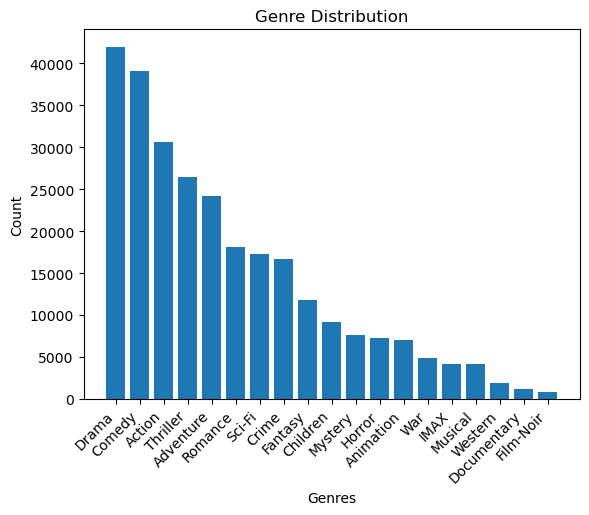

In [110]:
plt.bar(unique_genres.index, unique_genres)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

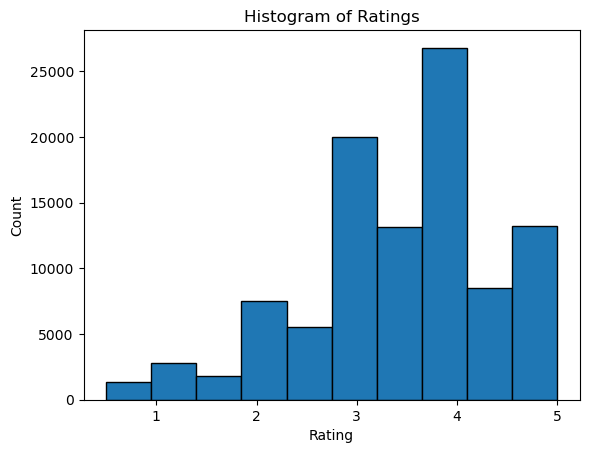

In [111]:
plt.hist(mvrt['rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.show()

In [112]:
genres_list = ['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance',
               'Sci-Fi', 'Crime', 'Fantasy', 'Children', 'Mystery', 'Horror',
               'Animation', 'War', 'IMAX', 'Musical', 'Western', 'Documentary', 'Film-Noir']

In [113]:
def average_rating_by_genre(data, genre_list):
    
    #one-hot encoding the genres
    genres_expanded = data['genres'].str.get_dummies(sep='|')
    
    #merging the the noraml dataset and the encoded
    data_genres = pd.concat([data, genres_expanded], axis=1)
    
    #calculating the average rating of each genre
    average_ratings = {}
    for genre in genre_list:
        if genre in data_genres.columns:
            average_rating = data_genres[data_genres[genre] == 1]['rating'].mean()
            average_ratings[genre] = average_rating

    return average_ratings

In [114]:
result = average_rating_by_genre(mvrt,genres_list)
result

{'Drama': 3.6561844113718758,
 'Comedy': 3.3847207640898267,
 'Action': 3.447984331646809,
 'Thriller': 3.4937055799183425,
 'Adventure': 3.5086089151939075,
 'Romance': 3.5065107040388437,
 'Sci-Fi': 3.455721162210752,
 'Crime': 3.658293867274144,
 'Fantasy': 3.4910005070136894,
 'Children': 3.412956125108601,
 'Mystery': 3.632460255407871,
 'Horror': 3.258195034974626,
 'Animation': 3.6299370349170004,
 'War': 3.8082938876312,
 'IMAX': 3.618335343787696,
 'Musical': 3.5636781053649105,
 'Western': 3.583937823834197,
 'Documentary': 3.797785069729286,
 'Film-Noir': 3.920114942528736}

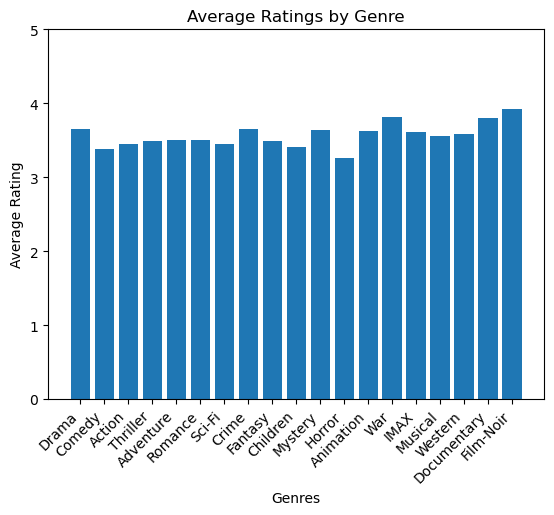

In [115]:
plt.bar(result.keys(), result.values())
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.ylim(0, 5)  # Set the y-axis limit to 5
plt.xticks(rotation=45, ha='right')  #for better visibility
plt.show()

In [116]:
#Counting how many ratings each movie has
vote_counts = mvrt['movieId'].value_counts().reset_index()
vote_counts.columns = ['movieId', 'vote_count']
#adding it to the mvrt dataframe
mvrt = pd.merge(mvrt, vote_counts, on='movieId', how='left')
mvrt.head()

,userId,movieId,rating,timestamp,title,genres,vote_count
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215


In [117]:
merged_movies = pd.merge(movies, vote_counts, on='movieId', how='left')
merged_movies

,movieId,title,genres,vote_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
9739,193585,Flint (2017),Drama,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1.0


In [118]:
m = merged_movies['vote_count'].quantile(0.90)
print(m)

27.0


In [119]:
#only keeping the movies with more than m (27) votes, in a new dataframe called q_movies.
q_movies = merged_movies.copy().loc[merged_movies['vote_count'] >= m]
#reseting the index for easier to read dataframe
q_movies = q_movies.reset_index(drop=True)
q_movies

,movieId,title,genres,vote_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,5,Father of the Bride Part II (1995),Comedy,49.0
4,6,Heat (1995),Action|Crime|Thriller,102.0
...,...,...,...,...
971,134130,The Martian (2015),Adventure|Drama|Sci-Fi,48.0
972,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,43.0
973,139385,The Revenant (2015),Adventure|Drama,31.0
974,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,32.0


In [120]:
#calculating the average rating for each movie
average_ratings = mvrt.groupby('movieId')['rating'].mean().reset_index()
average_ratings.columns = ['movieId', 'average_rating']

# Merging merged_movies with average_ratings
movies_average = pd.merge(merged_movies, average_ratings, on='movieId', how='left')
movies_average

,movieId,title,genres,vote_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0,3.500000
9739,193585,Flint (2017),Drama,1.0,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1.0,3.500000


In [121]:
average_rating_of_all = movies_average['average_rating'].mean()
print(average_rating_of_all)

3.2620668706545675


In [122]:
q_movies = movies_average.copy().loc[merged_movies['vote_count'] >= m]
q_movies

,movieId,title,genres,vote_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
5,6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
...,...,...,...,...,...
8879,134130,The Martian (2015),Adventure|Drama|Sci-Fi,48.0,4.000000
8900,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,43.0,3.813953
8990,139385,The Revenant (2015),Adventure|Drama,31.0,3.903226
9223,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,32.0,3.890625


In [123]:
#create a function to calculate WAR weighted average rating
def war(x, m=m, c=average_rating_of_all):
    v = x['vote_count']
    r = x['average_rating']
    return (v/(v+m) * r) + (m/(m+v) * c)

In [124]:
#calcutlating WAR
q_movies['score'] = movies_average.apply(war, axis=1)
print(q_movies['score'])

0       3.847421
1       3.398364
2       3.260453
4       3.139155
5       3.802913
          ...   
8879    3.734344
8900    3.601083
8990    3.604755
9223    3.602980
9433    3.593996
Name: score, Length: 976, dtype: float64


In [125]:
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'average_rating', 'score']].head(15)

,title,vote_count,average_rating,score
277,"Shawshank Redemption, The (1994)",317.0,4.429022,4.337430
659,"Godfather, The (1972)",192.0,4.289062,4.162447
2226,Fight Club (1999),218.0,4.272936,4.161534
224,Star Wars: Episode IV - A New Hope (1977),251.0,4.231076,4.136963
46,"Usual Suspects, The (1995)",204.0,4.237745,4.123705
257,Pulp Fiction (1994),307.0,4.197068,4.121484
461,Schindler's List (1993),220.0,4.225000,4.119740
1939,"Matrix, The (1999)",278.0,4.192446,4.110085
898,Star Wars: Episode V - The Empire Strikes Back...,211.0,4.215640,4.107461
314,Forrest Gump (1994),329.0,4.164134,4.095719


In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [127]:
movies['score'] = q_movies['score']
movies

,movieId,title,genres,score
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.847421
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.398364
2,3,Grumpier Old Men (1995),Comedy|Romance,3.260453
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN
4,5,Father of the Bride Part II (1995),Comedy,3.139155
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN
9739,193585,Flint (2017),Drama,NaN
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN


In [128]:
tfidf = TfidfVectorizer(stop_words='english')

In [129]:
#filling anything that does not that is null or NaN
movies['genres'] = movies['genres'].fillna('')
movies['score'] = movies['score'].fillna(0)

In [130]:
movies[movies['title'] == 'Shawshank Redemption, The (1994)']

,movieId,title,genres,score
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.33743


In [131]:
#Converting the genres into vectors
tfidf_matrix = tfidf.fit_transform(movies['genres'])

In [132]:
tfidf_matrix.shape

(9742, 23)

In [133]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix for each vs each genre
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(9742, 9742)

In [134]:
print(cosine_sim)

[[1.         0.81357774 0.15276924 ... 0.         0.4210373  0.26758648]
 [0.81357774 1.         0.         ... 0.         0.         0.        ]
 [0.15276924 0.         1.         ... 0.         0.         0.57091541]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.4210373  0.         0.         ... 0.         1.         0.        ]
 [0.26758648 0.         0.57091541 ... 0.         0.         1.        ]]


In [135]:
indices = pd.Series(movies.index, index=movies['genres']).drop_duplicates()
indices

genres
Adventure|Animation|Children|Comedy|Fantasy       0
Adventure|Children|Fantasy                        1
Comedy|Romance                                    2
Comedy|Drama|Romance                              3
Comedy                                            4
                                               ... 
Action|Animation|Comedy|Fantasy                9737
Animation|Comedy|Fantasy                       9738
Drama                                          9739
Action|Animation                               9740
Comedy                                         9741
Length: 9742, dtype: int64

In [136]:
def get_recommendations(genre, cosine_sim=cosine_sim):
        # Get the indices of movies with the specified genre
        genre_list = genre.split('|')
        sorted_genre_list = sorted(genre_list)
        separator = '|'
        genre = separator.join(sorted_genre_list)
        genre_indices = indices[genre]

        # Initialize an empty list to store similarity scores
        sim_scores = []

        # Iterate over the genre indices and get the cosine similarity scores
        for idx in genre_indices:
            sim_scores.extend(list(enumerate(cosine_sim[idx])))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 1000 most similar movies
        sim_scores = sim_scores[1:1000]

        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar movies
        genre_list = genre.split('|')
        movies_with_score = movies[['title', 'genres', 'score']].iloc[movie_indices]
        sorted_genre_list = sorted(genre_list)
        filtered_movies = movies[(movies['score'] > 0) & movies['genres'].apply(lambda x: all(genre in x for genre in sorted_genre_list))]
        sorted_movies = filtered_movies.sort_values(by='score', ascending=False)
        return sorted_movies.drop_duplicates(subset='title').head(5)

In [139]:
get_recommendations('Crime|Action')

,movieId,title,genres,score
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.161534
6710,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.088499
7372,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,3.938681
4176,6016,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,3.912508
254,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,3.891099


In [137]:
get_recommendations('Romance')

,movieId,title,genres,score
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.095719
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.077372
694,912,Casablanca (1942),Drama|Romance,4.032093
3622,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,4.014121
4909,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,4.006809


In [138]:
get_recommendations('Adventure|Romance')

,movieId,title,genres,score
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.077372
6772,60069,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,3.893708
690,908,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller,3.887807
3194,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,3.784649
5791,31658,Howl's Moving Castle (Hauru no ugoku shiro) (2...,Adventure|Animation|Fantasy|Romance,3.747400
